TITLE: Omni_Krypto_10

Project Team Members: Chris Diaz, Jaime Leon, Yutika Misra, Griselda Ramos

Motivation & Summary Slide

Define the core message or hypothesis of your project.

Due to the spike of the cryptocurrency market (aka Crypto-boom), many investors have been pivoting away from traditional stock and bond portfolios and allocating their assets into various cryptocurrencies. Cryptocurrency by nature is high risk, high reward, yet the question remains, what coin should I invest in?

Many investors want to invest in crypto however do not have the time or resources to do the proper due diligence
neccessary to create a diversified "crypto" portfolio. Our project is focused on developing three different crypto-currency portfolios ranging from conservative to high risk. Our goal is to present analysis for the investor to choose a uniquely designed portfolio that best fits their risk tolerance and investment needs.

Omni_Krypto_10 is separated into three distinct portfolios: Omni-Krypto Blue (Conservative), Omni-Krypto Yellow (Moderate), and Omni-Krypto Green (Aggressive).
        

We have run analysis on 10 coins that will be utilized in each portfolio. 
    

Describe the questions you asked, and why you asked them.
Describe whether you were able to answer these questions to your satisfaction, and briefly summarize your findings.


Calculations: daily returns, coorelation & heatmap, dominance

In [11]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [12]:
# import files

binance_data = Path("crypto_dataset/Binance_Coin.csv")
binance = pd.read_csv(binance_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
binance.drop(columns=['SNo', "Vol." ],inplace=True)
binance.rename(columns = {'Price':'Binance'}, inplace = True)
binance.sort_values('Date', ascending=True).dropna()
#binance.columns = pd.MultiIndex.from_product([['Binance'], binance.columns])


bitcoin_data = Path("crypto_dataset/Bitcoin.csv")
bitcoin = pd.read_csv(bitcoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
bitcoin.drop(columns=['SNo', "Vol." ],inplace=True)
bitcoin.rename(columns = {'Price':'Bitcoin'}, inplace = True)
bitcoin.sort_values('Date', ascending=True).dropna()
#bitcoin.columns = pd.MultiIndex.from_product([['Bitcon'], bitcoin.columns])


cardano_data = Path("crypto_dataset/Cardano.csv")
cardano = pd.read_csv(cardano_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cardano.drop(columns=['SNo', "Vol." ],inplace=True)
cardano.rename(columns = {'Price':'Cardano'}, inplace = True)
cardano.sort_values('Date', ascending=True).dropna()
#cardano.columns = pd.MultiIndex.from_product([['Cardano'], cardano.columns])

dogecoin_data = Path("crypto_dataset/dogecoin.csv")
dogecoin = pd.read_csv(dogecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
dogecoin.drop(columns=['SNo', "Vol." ],inplace=True)
dogecoin.rename(columns = {'Price':'Dogecoin'}, inplace = True)
dogecoin.sort_values('Date', ascending=True).dropna()
#dogecoin.columns = pd.MultiIndex.from_product([['Dogecoin'], dogecoin.columns])


ethereum_data = Path("crypto_dataset/ethereum.csv")
ethereum = pd.read_csv(ethereum_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
ethereum.drop(columns=['SNo', "Vol." ],inplace=True)
ethereum.rename(columns = {'Price':'Ethereum'}, inplace = True)
ethereum.sort_values('Date', ascending=True).dropna()
#ethereum.columns = pd.MultiIndex.from_product([['Ethereum'], ethereum.columns])


iota_data = Path("crypto_dataset/iota.csv")
iota = pd.read_csv(iota_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
iota.drop(columns=['SNo', "Vol." ],inplace=True)
iota.rename(columns = {'Price':'Iota'}, inplace = True)
iota.sort_values('Date', ascending=True).dropna()
#iota.columns = pd.MultiIndex.from_product([['Iota'], iota.columns])


litecoin_data = Path("crypto_dataset/litecoin.csv")
litecoin = pd.read_csv(litecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
litecoin.drop(columns=['SNo', "Vol." ],inplace=True)
litecoin.rename(columns = {'Price':'Litecoin'}, inplace = True)
litecoin.sort_values('Date', ascending=True).dropna()
#litecoin.columns = pd.MultiIndex.from_product([['Litecoin'], litecoin.columns])

monero_data = Path("crypto_dataset/monero.csv")
monero = pd.read_csv(monero_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
monero.drop(columns=['SNo', "Vol." ],inplace=True)
monero.rename(columns = {'Price':'Monero'}, inplace = True)
monero.sort_values('Date', ascending=True).dropna()
#monero.columns = pd.MultiIndex.from_product([['Monero'], monero.columns])

stellar_data = Path("crypto_dataset/stellar.csv")
stellar = pd.read_csv(stellar_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
stellar.drop(columns=['SNo', "Vol." ],inplace=True)
stellar.rename(columns = {'Price':'Stellar'}, inplace = True)
stellar = stellar.sort_values('Date', ascending=True).dropna()
#stellar.columns = pd.MultiIndex.from_product([['Stellar'], stellar.columns])



xpr_data = Path("crypto_dataset/XPR.csv")
xpr = pd.read_csv(xpr_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
xpr.drop(columns=['SNo', "Vol." ],inplace=True)
xpr.rename(columns = {'Price':'XPR'}, inplace = True)
xpr = xpr.sort_values('Date', ascending=True).dropna()
#xpr.columns = pd.MultiIndex.from_product([['XPR'], xpr.columns])

xpr

,XPR,Open,High,Low,Change %
Date,,,,,
2018-01-01,2.05000,1.98000,2.09000,1.81000,3.54
2018-01-02,2.19000,2.05000,2.21000,1.89000,6.83
2018-01-03,2.73000,2.19000,2.85000,2.15000,24.66
2018-01-04,2.73000,2.73000,3.29000,2.58000,0.00
2018-01-05,2.51000,2.73000,3.05000,2.24000,-8.06
...,...,...,...,...,...
2021-08-20,1.26318,1.23482,1.28762,1.19994,2.29
2021-08-21,1.21663,1.26316,1.28262,1.20444,-3.69
2021-08-22,1.22574,1.21654,1.25540,1.18284,0.75


In [13]:
#Concat all coin prices into one data frame
#
combined_df = pd.concat([binance, bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar,xpr],
              axis="columns", join="inner")
combined_df.head()

prices_df= combined_df[['Binance','Bitcoin','Cardano','Dogecoin','Ethereum','Iota','Litecoin','Monero','Stellar', 'XPR' ]]
prices_df.head()

#joined_data = pd.concat([binance,bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar, xpr],
#             axis="columns", join="inner")

#joined_data.head()


,Binance,Bitcoin,Cardano,Dogecoin,Ethereum,Iota,Litecoin,Monero,Stellar,XPR
Date,,,,,,,,,,
2018-01-01,8.45,13444.9,0.702200,0.008678,752.46,3.90,225.22,335.10,0.4848,2.05
2018-01-02,8.72,14754.1,0.762000,0.009000,858.78,3.98,253.31,364.17,0.5570,2.19
2018-01-03,9.30,15156.6,1.080000,0.009205,942.01,4.13,244.99,386.00,0.8860,2.73
2018-01-04,9.14,15180.1,1.104300,0.009613,940.00,4.10,238.91,368.10,0.6948,2.73
2018-01-05,14.88,16954.8,0.994903,0.012550,962.77,3.76,246.23,356.96,0.6351,2.51


In [14]:
pricechange_df=prices_df.pct_change()

In [15]:
# seven day percent change in price

pricechange7_df=prices_df.pct_change(periods=7).dropna()

pricechange7_df.hvplot(ylabel="Percent Change",  ylim=(-2,5),width=1000, height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [16]:
pricechange_df.head()

,Binance,Bitcoin,Cardano,Dogecoin,Ethereum,Iota,Litecoin,Monero,Stellar,XPR
Date,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.031953,0.097375,0.085161,0.037105,0.141297,0.020513,0.124722,0.086750,0.148927,0.068293
2018-01-03,0.066514,0.027281,0.417323,0.022778,0.096917,0.037688,-0.032845,0.059945,0.590664,0.246575
2018-01-04,-0.017204,0.001550,0.022500,0.044324,-0.002134,-0.007264,-0.024817,-0.046373,-0.215801,0.000000
2018-01-05,0.628009,0.116910,-0.099065,0.305524,0.024223,-0.082927,0.030639,-0.030264,-0.085924,-0.080586


In [17]:

# 30 day percent change 
pricechange30_df=prices_df.pct_change(30).dropna()

pricechange30_df.hvplot(ylabel="Percent Change",  ylim=(-2,5),width=1000, height=500)



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Volatility/ Standard Deviation

In [18]:
#find the daily percent change of each coin
pricechange_df=prices_df.pct_change().dropna()

#calculate the daily standard deviation of each coin, crypto trades every day
daily_volatility=pricechange_df.std()*np.sqrt(365)

#sorted the daily volatilities in ascending order
daily_volatility=daily_volatility.sort_values(ascending=True)
daily_volatility

Bitcoin      0.778142
Ethereum     1.013531
Monero       1.050838
Litecoin     1.077591
Iota         1.183531
Cardano      1.231092
Binance      1.244949
XPR          1.250675
Stellar      1.267555
Dogecoin    32.522483
dtype: float64

## Correlations

In [19]:
# Calculate the correlation based on 7 day percent change
correlation = pricechange7_df.corr()
correlation

,Binance,Bitcoin,Cardano,Dogecoin,Ethereum,Iota,Litecoin,Monero,Stellar,XPR
Binance,1.000000,0.553197,0.542783,0.077685,0.558195,0.610258,0.571412,0.576848,0.389098,0.413181
Bitcoin,0.553197,1.000000,0.659372,0.084479,0.764251,0.672275,0.802026,0.759013,0.565934,0.503921
Cardano,0.542783,0.659372,1.000000,0.094815,0.715464,0.772185,0.662135,0.597448,0.745966,0.588517
Dogecoin,0.077685,0.084479,0.094815,1.000000,0.101867,0.102048,0.124739,0.092780,0.086019,0.083290
Ethereum,0.558195,0.764251,0.715464,0.101867,1.000000,0.676731,0.769229,0.689983,0.661194,0.562791
Iota,0.610258,0.672275,0.772185,0.102048,0.676731,1.000000,0.703105,0.704024,0.646696,0.625326
Litecoin,0.571412,0.802026,0.662135,0.124739,0.769229,0.703105,1.000000,0.741628,0.573480,0.566831
Monero,0.576848,0.759013,0.597448,0.092780,0.689983,0.704024,0.741628,1.000000,0.535919,0.545248
Stellar,0.389098,0.565934,0.745966,0.086019,0.661194,0.646696,0.573480,0.535919,1.000000,0.711739
XPR,0.413181,0.503921,0.588517,0.083290,0.562791,0.625326,0.566831,0.545248,0.711739,1.000000


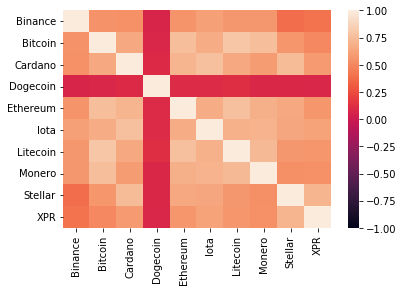

In [20]:
# heatmap on coorelation 
sns.heatmap(correlation, vmin=-1, vmax=1)

In [21]:
#total coorelation 
total_correlation= correlation.sum(axis=1).sort_values()
total_correlation

Dogecoin    1.847723
Binance     5.292658
XPR         5.600845
Stellar     5.916045
Monero      6.242891
Bitcoin     6.364468
Cardano     6.378684
Ethereum    6.499705
Iota        6.512648
Litecoin    6.514585
dtype: float64

## Reasoning behind porfolios

### Dogecoin is the coin that least coorelates with the rest of the group
### Choosing assets with low correlation with each other can help to reduce the risk of a portfolio
### we will use correlation and volatility entandum to asess risk. 
### Even though bitcoin and ethereum are still highly correlated to other stocks, they make up a large market capitalization of the crypto market and are therefore assumed to be safer.

## Cumulative Returns of Individual Coins, Percentage

In [22]:
#cumulative returns based on seven day percent change for all coins
cumulative_returns = (1 + pricechange_df).cumprod()


cumulative_returns=cumulative_returns.dropna()
cumulative_returns
cumulative_returns.hvplot(title='Cumulative Returns of Individual Coins',ylabel='Percentage Returns',xlabel='Dates')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

# Portfolio Allocation

### Cumulative returns on a 10K investment Conservative Portfolio Blue

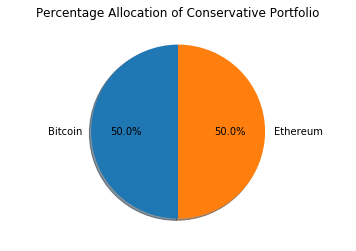

In [23]:
#plot = df.plot.pie(y='mass', figsize=(5, 5))
plt.figure(0)
labels2 =[ 'Bitcoin','Ethereum']
percents2 = [0.5, 0.5]
explode2=[0,0]
plt.axis('equal')
plt.pie(percents2, labels=labels2, explode = explode2, autopct='%1.1f%%', shadow=True, startangle=90, radius=1)
plt.title("Percentage Allocation of Conservative Portfolio")
plt.show()

In [24]:
# omni crypto conservative blue
#'Binance Price','Bitcoin Price' 25%,'Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price '25%,'Litecoin Price'
weights_conservative = [0, .5,0,0,.5,0,0,0,.0,0]
portfolio_returns_conservative = pricechange_df.dot(weights_conservative)
portfolio_returns_conservative.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns_conservative).cumprod()
(initial_investment * cumulative_returns).hvplot(title='Cumulative Returns of Historical Conservative Portfolio',ylabel='Dollars',xlabel='Dates')

:Curve   [Date]   (0)

### Sharpe Ratio

In [25]:
# Calculate Annualized Sharpe Ratio 
conservative_sharpe_ratio= (portfolio_returns_conservative.mean()*365) / (portfolio_returns_conservative.std() * np.sqrt(365))
conservative_sharpe_ratio

print(f"Omni-Krypto Blue (Conservative) Porfolio's Sharpe Ratio is: {conservative_sharpe_ratio}")

Omni-Krypto Blue (Conservative) Porfolio's Sharpe Ratio is: 0.9406568610573989


# omni crypto Aggressive green

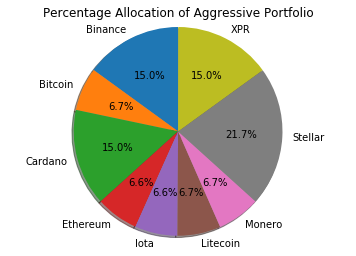

In [26]:
#plot = df.plot.pie(y='mass', figsize=(5, 5))
plt.figure(1)
labels2 =[ 'Binance','Bitcoin','Cardano','Ethereum','Iota','Litecoin','Monero','Stellar', 'XPR']
percents2 = [0.15, 0.067,.15,.066,.066,.067,.067,.2167,.15]
explode2=[0,0,0,0,0,0,0,0,0]
plt.axis('equal')
plt.pie(percents2, labels=labels2, explode = explode2, autopct='%1.1f%%', shadow=True, startangle=90, radius=1.2)
plt.title("Percentage Allocation of Aggressive Portfolio")
plt.show()

In [27]:
#Cumulative Returns
# omni crypto Aggressive green
'Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price'
weights = [0.15, 0.067,.15,0,.066,.066,.067,.067,.2167,.15]
portfolio_returns_aggresive = pricechange_df.dot(weights)
portfolio_returns_aggresive.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns_aggresive).cumprod()
(initial_investment * cumulative_returns).hvplot(title='Cumulative Returns of Historical Aggressive Portfolio',ylabel='Dollars',xlabel='Dates')

:Curve   [Date]   (0)

# Sharpe Ratio

In [28]:
# Calculate Annualized Sharpe Ratio 
aggresive_sharpe_ratio= (portfolio_returns_aggresive.mean()*365) / (portfolio_returns_aggresive.std() * np.sqrt(365))
aggresive_sharpe_ratio

print(f"Omni-Krypto Green (Aggresive) Porfolio's Sharpe Ratio is: {aggresive_sharpe_ratio}")

Omni-Krypto Green (Aggresive) Porfolio's Sharpe Ratio is: 0.9172852260353694


In [67]:
# start a poll at the begining of class. 

# charts that validate porfolio allocation- coorelation, heat map- before portfolios are created
# for each portfolio: sharpe rato, cumulative returns, monte carlo (?) 

# plot all together. and use a new library 

# wrapping up? review pole results. 

In [35]:
#Questions & Data

##Elaborate on the questions you asked, describing what kinds of data you needed to answer them and where you found it.

In [36]:
#Data Cleanup & Exploration

##Describe the exploration and cleanup process.
##Discuss insights you had while exploring the data that you didn't anticipate.
##Discuss any problems that arose after exploring the data, and how you resolved them.
##Present and discuss interesting figures developed during exploration, ideally with the help of Jupyter Notebook.

In [37]:
#Data Analysis

##Discuss the steps you took to analyze the data and answer each question you asked in your proposal.
##Present and discuss interesting figures developed during analysis, ideally with the help of Jupyter Notebook.

In [38]:
#Postmortem

##Discuss any difficulties that arose, and how you dealt with them.
##Discuss any additional questions that came up, but which you didn't have time to answer: 
##What would you research next, if you had two more weeks?

In [39]:
#Questions

##Open-floor Q&A with the audience